# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 5.75 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Part 1**

Load the ./data/college_completion.csv data with Pandas.

In [4]:
import pandas as pd
college = pd.read_csv("/content/visualization/assignment/data/college_completion.csv")

**Part 2**

What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [8]:
college.shape

(3798, 63)



*   Dimensions of data are (3798,63), meaning 3798 obvervations and 63 columns.


In [11]:
college.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  



*   The 63 variables included are listed here: 'index', 'unitid', 'chronname', 'city','state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count','awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value','exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
       'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',
       'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer',
       'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer',
       'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer',
       'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames',
       'cohort_size'



In [6]:
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


**Part 3**

Cross tabulate control and level. Describe the patterns you see.

In [12]:
pd.crosstab(college['control'], college['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632




*   The highest numbers are the 1,180 4-year private not-for-profit colleges and the 926 2-year public colleges.
*   The smalelst numbers are the 68 private not-for-profit 2-year schools and 465 2-year private for-profit schools.
*   The most striking is hwo few private not-for-profit 2-year schools there are.
*   2-year programs are dominated by public schools.











**Part 4**

For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.



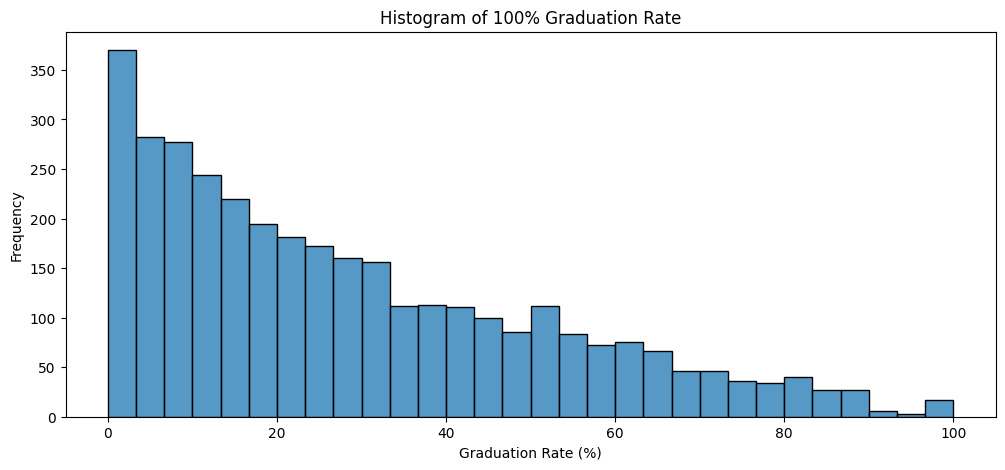

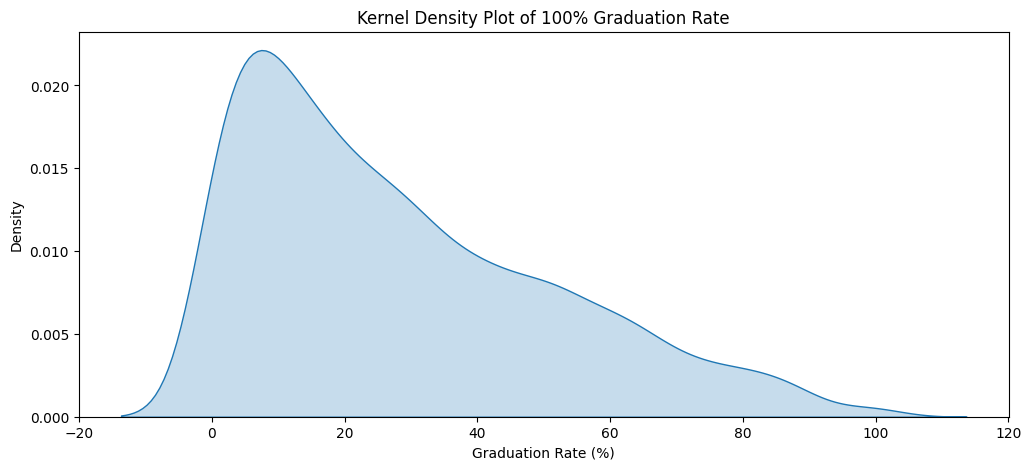

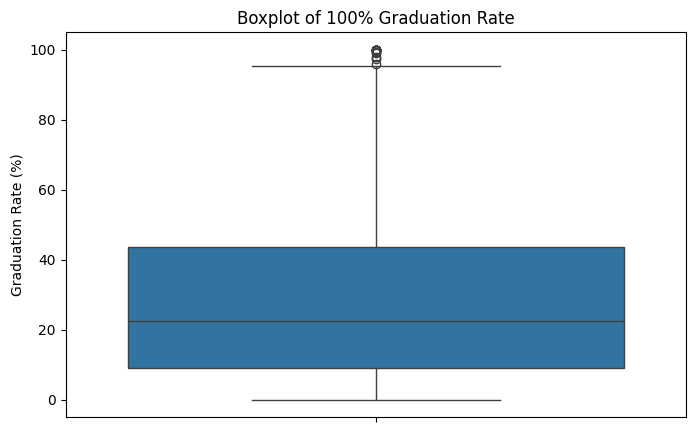

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 5))
sns.histplot(college['grad_100_value'], bins=30, kde=False)
plt.title("Histogram of 100% Graduation Rate")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Kernel Density Plot
plt.figure(figsize=(12, 5))
sns.kdeplot(college['grad_100_value'].dropna(), fill=True)
plt.title("Kernel Density Plot of 100% Graduation Rate")
plt.xlabel("Graduation Rate (%)")
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=college['grad_100_value'])
plt.title("Boxplot of 100% Graduation Rate")
plt.ylabel("Graduation Rate (%)")
plt.show()

# Statistical Description
stats_desc = college['grad_100_value'].describe()
print(stats_desc)

# ChatGPT helped me do this

**Part 5**

For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

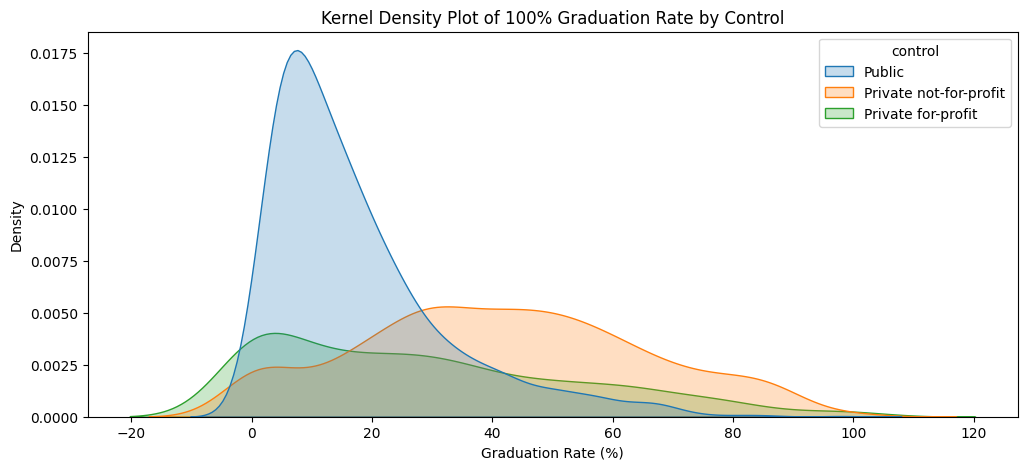

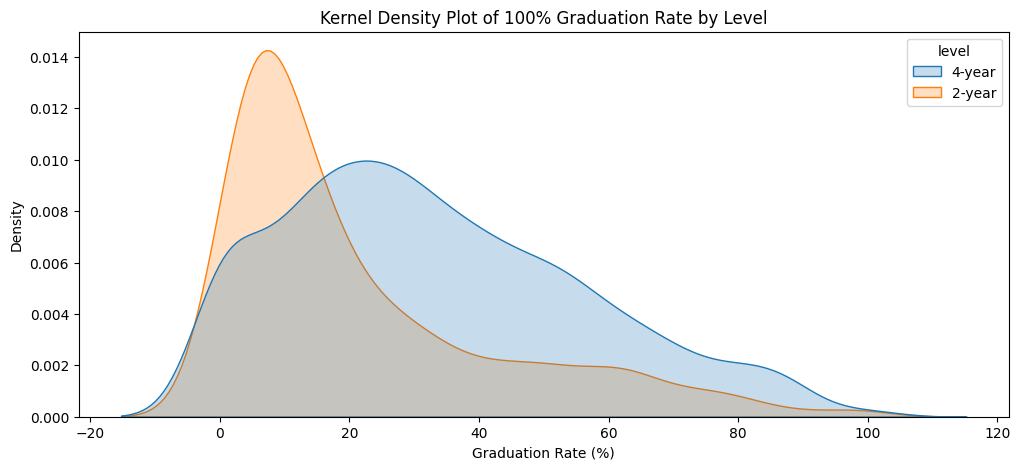

In [16]:
# Grouped Kernel Density Plot by Control
plt.figure(figsize=(12, 5))
sns.kdeplot(data=college, x='grad_100_value', hue='control', fill=True)
plt.title("Kernel Density Plot of 100% Graduation Rate by Control")
plt.xlabel("Graduation Rate (%)")
plt.show()

# Grouped Kernel Density Plot by Level
plt.figure(figsize=(12, 5))
sns.kdeplot(data=college, x='grad_100_value', hue='level', fill=True)
plt.title("Kernel Density Plot of 100% Graduation Rate by Level")
plt.xlabel("Graduation Rate (%)")
plt.show()

# ChatGPT helped me do this




*   Private not-for-profit seem to have higher graduation rates than private for profit and public programs
*   4-year programs seem to have higher graduation rates than 2-years.


*   Public institutions have the highest density peak around 10%, suggesting a large number of public institutions with low graduation rates.
*   2-year programs tend to have lower graduation rates with a peak around 10%, while 4-year graduation rates have a peak around 25%.




In [21]:
# Grouped Statistical Description by Control
control_stats = college.groupby('control')['grad_100_value'].describe()
print("Graduation Rate Statistics by Control:")
print(control_stats)

# Grouped Statistical Description by Level
level_stats = college.groupby('level')['grad_100_value'].describe()
print("\nGraduation Rate Statistics by Level:")
print(level_stats)

# ChatGPT helped me do this

Graduation Rate Statistics by Control:
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Graduation Rate Statistics by Level:
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0




*   Highest average graduation rate are private not-for-profit schools. Private not-for-profit also has the highest median graduation rates.
*   Highest average graduation rate for level are the 4-year programs. These statistics support the kernel density plots.



**Part 6**

Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

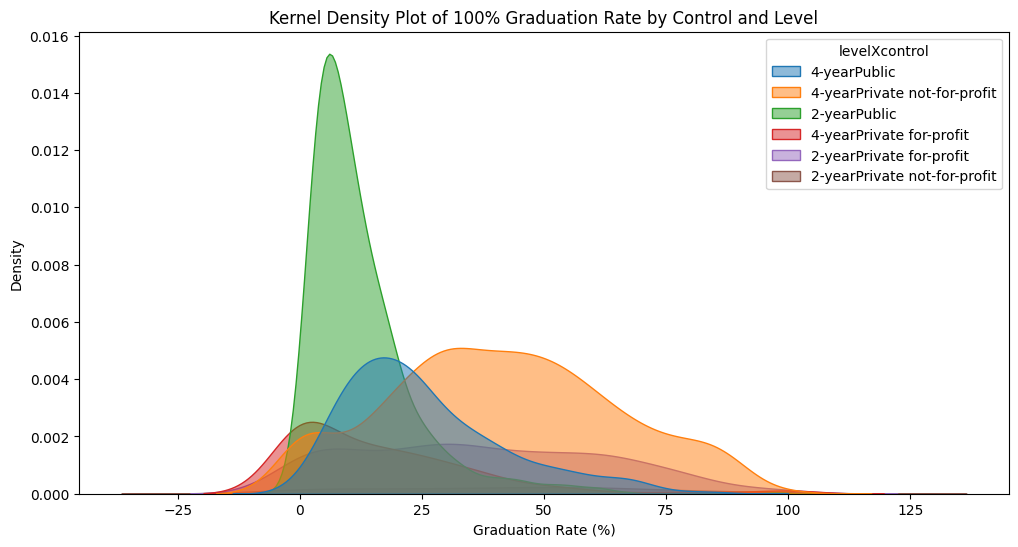

In [24]:
# Create a new column combining 'control' and 'level' for grouping
college['levelXcontrol'] = college['level'] + college['control']

# Kernel Density Plot grouped by both Control and Level
plt.figure(figsize=(12, 6))
sns.kdeplot(data=college, x='grad_100_value', hue='levelXcontrol', fill=True, alpha=0.5)
plt.title("Kernel Density Plot of 100% Graduation Rate by Control and Level")
plt.xlabel("Graduation Rate (%)")
plt.show()




*   4 year private not for profit programs have the highest graduation rates.



**Part 7**

Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

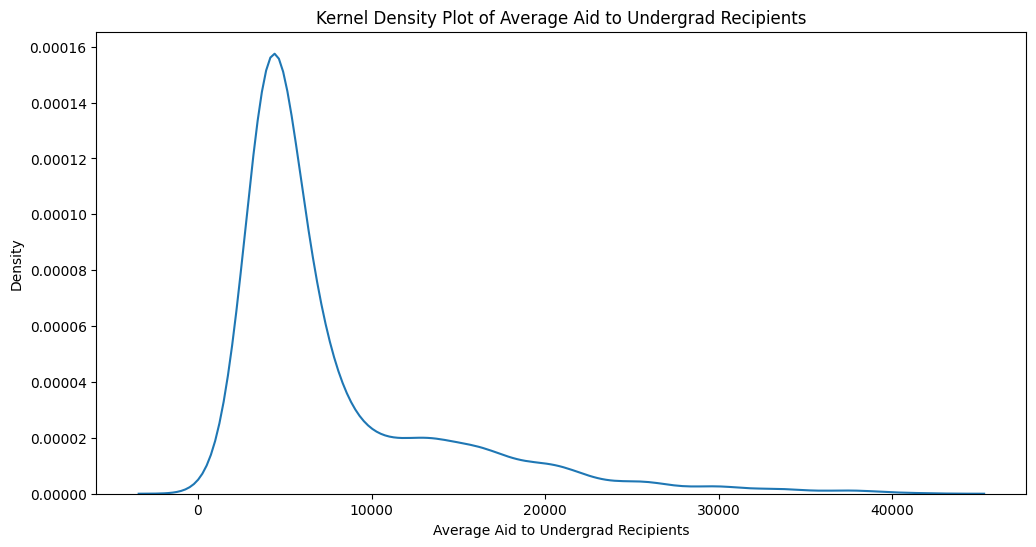

In [26]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=college, x='aid_value')
plt.title("Kernel Density Plot of Average Aid to Undergrad Recipients")
plt.xlabel("Average Aid to Undergrad Recipients")
plt.show()

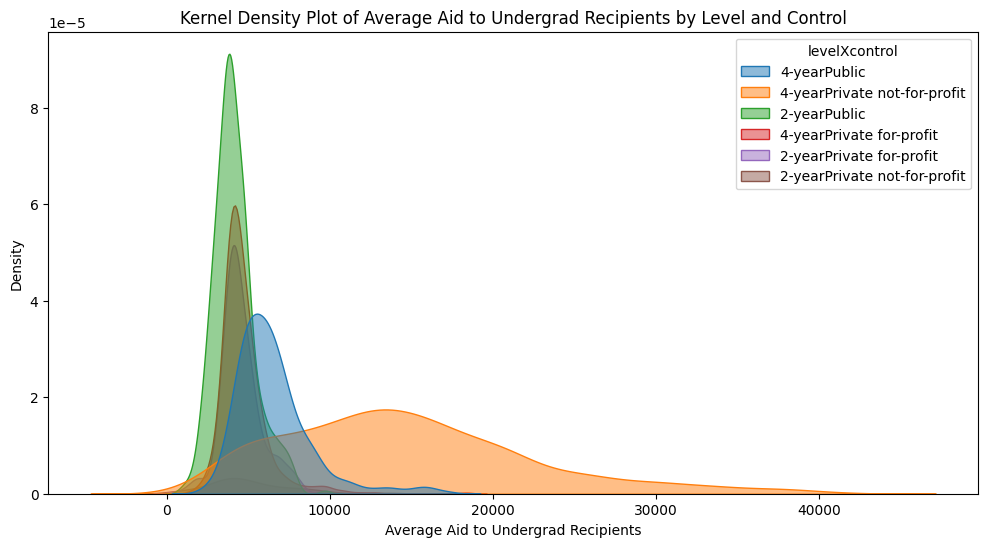

In [27]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=college, x='aid_value', hue='levelXcontrol', fill=True, alpha=0.5)
plt.title("Kernel Density Plot of Average Aid to Undergrad Recipients by Level and Control")
plt.xlabel("Average Aid to Undergrad Recipients")
plt.show()



*   All programs other than 4 year private not for profit universities are to explain the original shape of the graph.



In [32]:
college.groupby(['level', 'control'])['aid_value'].describe()

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

**Part 8**

Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

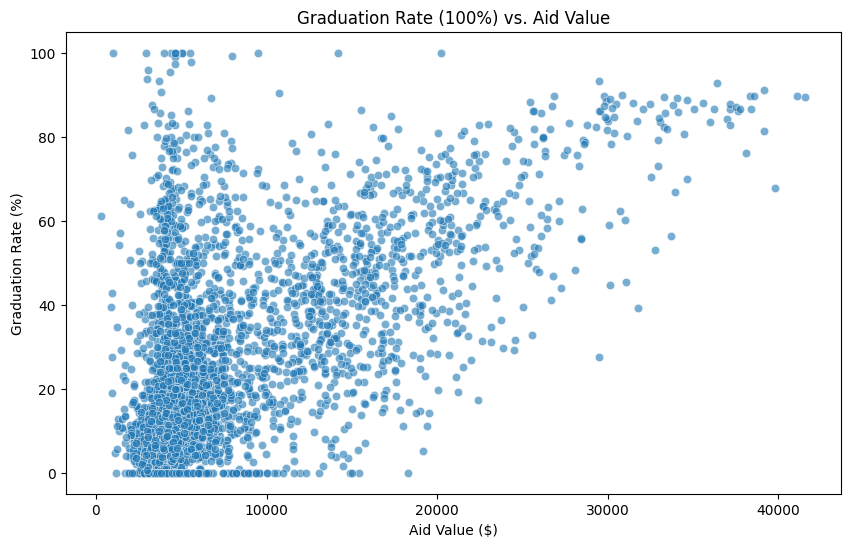

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=college, x='aid_value', y='grad_100_value', alpha=0.6)
plt.title("Graduation Rate (100%) vs. Aid Value")
plt.xlabel("Aid Value ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

# ChatGPT helped me with this


*   Seems to be a positive correlation between aid value and graduation rate.



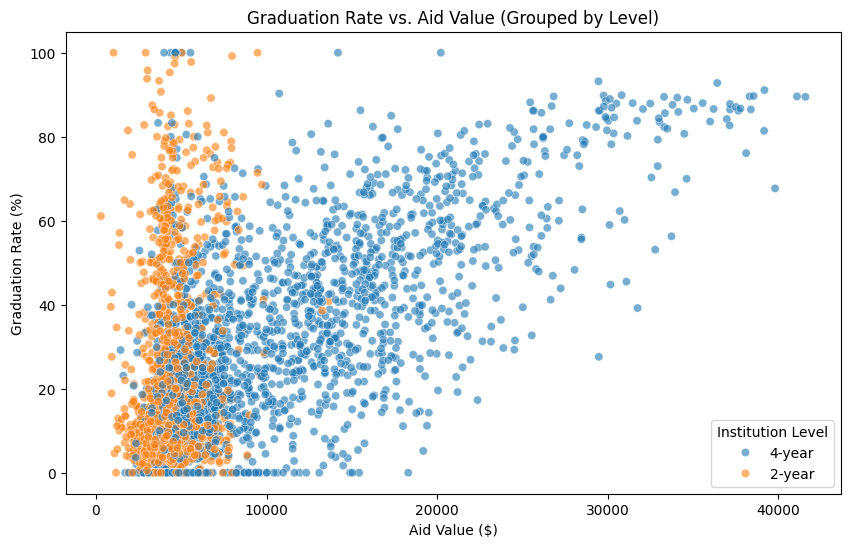

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=college, x='aid_value', y='grad_100_value', hue='level', alpha=0.6)
plt.title("Graduation Rate vs. Aid Value (Grouped by Level)")
plt.xlabel("Aid Value ($)")
plt.ylabel("Graduation Rate (%)")
plt.legend(title="Institution Level")
plt.show()

# ChatGPT helped me with this



*   2 year programs have less aid value. Correlation in 2 year programs is not clear.
*   There seems to be a positive correlation for 4 year programs


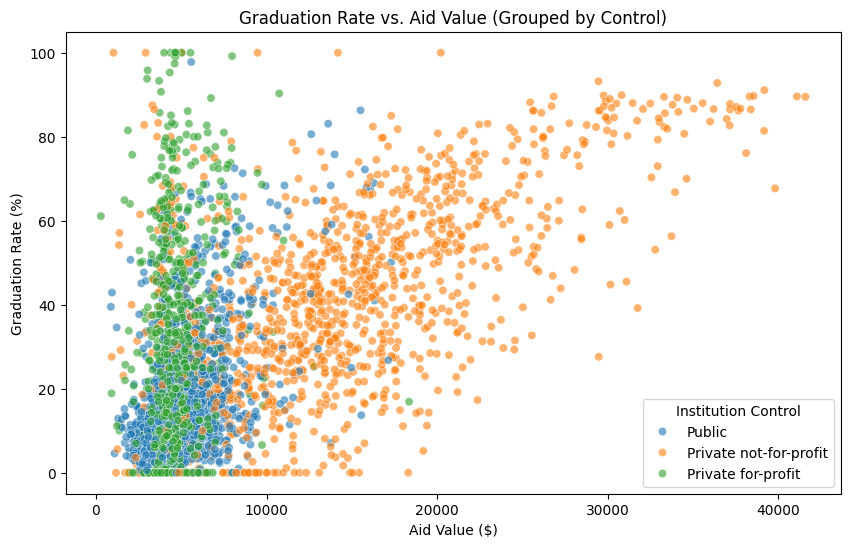

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=college, x='aid_value', y='grad_100_value', hue='control', alpha=0.6)
plt.title("Graduation Rate vs. Aid Value (Grouped by Control)")
plt.xlabel("Aid Value ($)")
plt.ylabel("Graduation Rate (%)")
plt.legend(title="Institution Control")
plt.show()
# ChatGPT helped me with this



*   Private not for profit programs have lower aid values and no clear correlation between aid value and graduation for those schools.
*   There could be a weak positive correlation between aid value and graduation rate for public institutions. These also look like smaller aid values than private not for profit
*   **Private not for profit institutions seem to have strongest positive correlation between aid value and graduation rate. Particularly private not for profit 4 year programs**






**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.